In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

In [14]:
heart = pd.read_csv("Heart.csv")
print(heart.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [15]:
# Question 1: Linear model MaxHR ~ Chol
X = heart['Chol']
y = heart['MaxHR']
X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  MaxHR   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.003545
Date:                Sat, 06 Sep 2025   Prob (F-statistic):              0.953
Time:                        16:17:26   Log-Likelihood:                -1377.8
No. Observations:                 303   AIC:                             2760.
Df Residuals:                     301   BIC:                             2767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.9813      6.418     23.367      0.0

In [16]:
# Question 2: t-statistic
t_stat = -1.587
df = 38
p_value = t.cdf(t_stat, df)
print("p-value:", p_value)

p-value: 0.06039999430151654


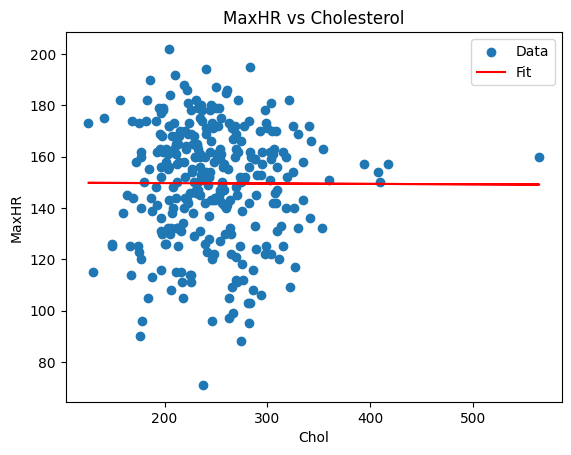

In [17]:
# Question 2: Scatter plot with regression line
plt.scatter(heart['Chol'], heart['MaxHR'], label='Data')
plt.plot(heart['Chol'], model.predict(X), color='red', label='Fit')
plt.xlabel('Chol')
plt.ylabel('MaxHR')
plt.title('MaxHR vs Cholesterol')
plt.legend()
plt.show()

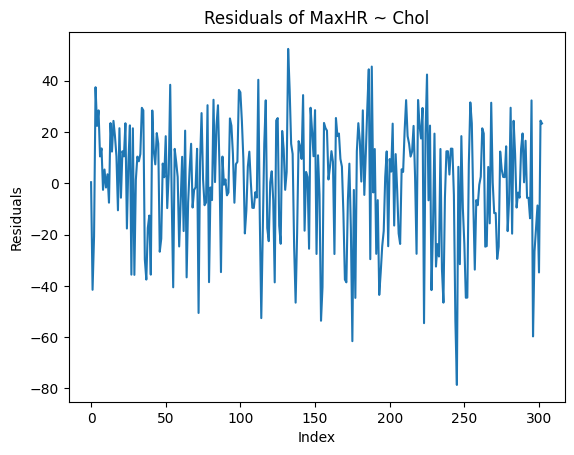

In [18]:
# Question 3: Plot residuals
residuals = model.resid
plt.plot(residuals)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals of MaxHR ~ Chol')
plt.show()